# Important Notes & Resources

**Purpose & Learning Goals**

The purpose of problem set 2 is to provide practice implementing a causal inference analysis. This serves our learning goal of developing a design toolkit that includes methods from the social sciences. During this problem set, you will also practice implementing and interpreting data analysis related to political polarization.

**Getting Started**

To get started, first save a copy of this colab notebook to your "My Drive". You will also need to save the two datafiles on Canvas (house_ideal_points.csv, and house_senate_50_51.csv) to your "My Drive."

In [1]:
from google.colab import drive

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/DATASCI 154/PS2"

#Packages for working with data
# Modin is a drop-in replacement for pandas, with multiple advantages
!pip install "modin[dask]"
import modin.pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb
import numpy as np

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 40.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


# Legislator Ideal Points

In this part, you will interpret some estimates of legislators' ideal points from the 79th to the 118th House of Representatives. To learn more about how these estimates are created, visit [voteview.com](https://voteview.com).

1. Load in the data file `house_ideal_points.csv` using [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from the `pandas` module. Print the first few rows. The estimated ideal points for legislators are in the `ideal_point` column. In this version of the data, each legislator gets a single constant ideal point that is based on their voting behavior throughout their careers. The `icpsr` column is a unique identifier for legislators.

In [2]:
ideal_points_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/house_ideal_points.csv")
ideal_points_df.head()

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37811
INFO:distributed.scheduler:  dashboard at:            127.0.0.1:8787
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32977'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46657'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37717', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37717
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33960
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:39647', name: 0, s

,congress,chamber,icpsr,district_code,state_abbrev,party,bioname,ideal_point
0,79,House,195,3.0,AL,D,"ANDREWS, George William",-0.030
1,79,House,937,1.0,AL,D,"BOYKIN, Frank William",-0.105
2,79,House,3754,2.0,AL,D,"GRANT, George McInvale",-0.117
3,79,House,4471,4.0,AL,D,"HOBBS, Samuel Francis",-0.176
4,79,House,4892,6.0,AL,D,"JARMAN, Peterson Bryant (Pete)",-0.238


2. Make a plot of the median ideal points for each party over time. In your graph, you should have two lines. You should have the congress number on the x-axis, and the median ideal point on the y-axis. In your graph, you should have two lines: one for republicans and one for democrats.

Hint: To compute medians by congress and party, check out [`group_by`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) from the `pandas` module.

Hint:Your plot should look like this.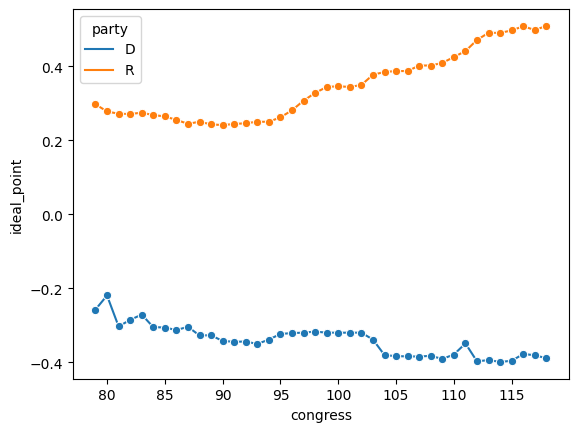

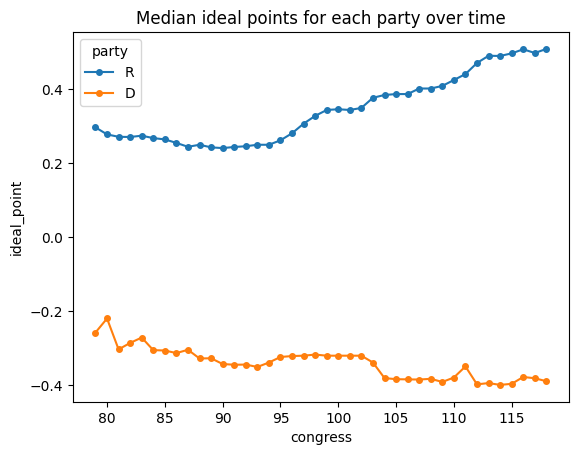

In [3]:
party_R = ideal_points_df[ideal_points_df["party"] == "R"]
party_D = ideal_points_df[ideal_points_df["party"] == "D"]
grouped_congress_R = party_R.groupby(by=["congress"])["ideal_point"].median()
grouped_congress_D = party_D.groupby(by=["congress"])["ideal_point"].median()

mplt.plot(grouped_congress_R, marker="o", markersize=4)
mplt.plot(grouped_congress_D, marker="o", markersize=4)
mplt.title("Median ideal points for each party over time")
mplt.xlabel("congress")
mplt.ylabel("ideal_point")
mplt.legend(["R", "D"], title="party")
mplt.show()

3. According to the estimates you plotted, how has party polarization changed over time? Name two factors that you think may have contributed to the trends you plotted.

Party polarization has increased over time, with Republicans straying further from the centre at a greater rate than that of the Democrats.

This could be due to closed primary elections, where voters vote for nominees to enter the general elections. Those who participate in voting during this period are mostly extremists or activists, who want to push for a certain agenda, thus driving the lean further to the extremes

It could also be due to gerrymandering, which is a process where politicians manipulate and reorganize districts such that they know the majority in that district is going to vote for that party only, thus having a clear advantage. These politicians are usually extreme with their agenda, which creates a wider rift between the two sides.

4. Subset the data to the 118th Congress. Who is the most moderate and most extreme Democrat? Who is the most moderate and most extreme Republican?

Hint: Check out [`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) from the `pandas` module.

In [ ]:
congress_118 = ideal_points_df[ideal_points_df["congress"] == 118]
congress_118.sort_values(by=["ideal_point"], inplace=True)
# D goes negative
most_moderate_D_ideal_point = congress_118[congress_118["party"] == "D"]["ideal_point"].max()
most_moderate_D = congress_118[(congress_118["party"] == "D") & (congress_118["ideal_point"] == most_moderate_D_ideal_point)]
print(f"Most moderate Democrat is {most_moderate_D['bioname'].values[0]}\n")

most_extreme_D_ideal_point = congress_118[congress_118["party"] == "D"]["ideal_point"].min()
most_extreme_D = congress_118[(congress_118["party"] == "D") & (congress_118["ideal_point"] == most_extreme_D_ideal_point)]
print(f"Most extreme Democrat is {most_extreme_D['bioname'].values[0]}\n")

# R goes positive
most_moderate_R_ideal_point = congress_118[congress_118["party"] == "R"]["ideal_point"].min()
most_moderate_R = congress_118[(congress_118["party"] == "R") & (congress_118["ideal_point"] == most_moderate_R_ideal_point)]
print(f"Most moderate Republican is {most_moderate_R['bioname'].values[0]}\n")

most_extreme_R_ideal_point = congress_118[congress_118["party"] == "R"]["ideal_point"].max()
most_extreme_R = congress_118[(congress_118["party"] == "R") & (congress_118["ideal_point"] == most_extreme_R_ideal_point)]
print(f"Most extreme Republican is {most_extreme_R['bioname'].values[0]}\n")

Most moderate Democrat is GOLDEN, Jared

Most extreme Democrat is GARCIA, Sylvia

Most moderate Republican is FITZPATRICK, Brian K.

Most extreme Republican is MCCORMICK, Rich



5. Look up the policy platforms of these members of Congress. Do the relative positions of their ideal points make sense to you given their platforms? Why or why not?

[GOLDEN, Jared](https://jaredgoldenforcongress.com/issues/)

Moderate: Referring to his "Expanding Healthcare Coverage" campaign, his efforts are very controlled and time-gated, Eg. "Caps Medicare beneficiaries’ out-of-pocket costs at $2,000 per year, with the ability for seniors to spread the cost over 12 monthly payments." This is suggestive of a very moderate approach that does not change up things that fast or vigorously.'

Democrat: His campaign advocates for economic equality (Expanding Healthcare Coverage and Standing Up for Workers and Good Jobs)

[GARCIA, Sylvia](https://www.sylviaforcongress.com/issues)

Extreme: Compared to the most moderate democrat, Garcia uses very emotionally charged and loaded language, Eg, "The Trump tax plan is an epic failure... not a boondoggle for the president’s buddies and the super elite", suggesting a very heavy-handed and taking-charge approach, that is typical of an extreme standpoint.

Democrat: Her campaign advocates for social equality (women) and economic equality (affordable healthcare). However, it is surprising she "voted against raising property taxes" in the last budget passed by the Texas Senate, as "it did little to help public education or access to healthcare for people.". Perhaps it is this critical judgement that also makes her extreme.

[FITZPATRICK, Brian K.](https://www.brianfitzpatrick.com/)

Moderate: In his statement, he states "our community is not far-left or far-right, we are centrist and pragmatic." In addition, his campaign addresses many issues, one of which concerns LGBTQ Equality and Diversity, where he proclaims he "co-led and voted for the Equality Act". As Republicans are usually more conservative, this thus points to his moderateness.

Republican: Focuses on issues like safety ("keeping our families safe")

[MCCORMICK, Rich](https://www.richmccormick.us/)

Extreme: His language is equally charged, in opposition to Democratic activities: "The Biden administration has cultivated inflation, regulation, taxation, and shame toward our nation." He deems some regulations unnecessary "that limit growth with no benefit" and wants to remove them.

Republican: Advocates for military development: "Restore America’s military might, Prepare our troops for the next battle, Deliver better healthcare to veterans", which are usually areas of focus for republicans


Indeed, the relative positions of their ideal points make a lot of sense to me.

# The Effect of Rule Changes on Extremism

In this part, we will practice using some of the causal inference tools we talked about in lecture with a historical example of partisan polarization. The Gilded Age was a time of extreme partisan gridlock in the House of Representatives, in which the minority party would often frustrate the majority party's agenda with various delay tactics. One famous such tactic was the "disappearing quorum," where members of the minority party would simply refuse to declare themselves present during roll calls, thereby preventing the House from doing any business.

When the Republican party took back the majority in the 51st Congress, the Speaker of the House Thomas Reed implemented some major changes to prevent the minority party from engaging in these tactics. Among other reforms, he required that all members physically present in the chamber would be counted for purposes of a quorum, and allowed a majority vote to close debate on any part of a bill.

We will use a difference-in-differences design to ask what the effect of these rule changes were on the political extremism of members of the House.


6. Load in the data file `house_senate_50_51.csv` using [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from the `pandas` module. Print the first few rows. Each row represents a legislator in a particular session of Congress (50 or 51) in either the House or the Senate. Extremism is the absolute value of a time-varying measure of the legislators' ideal points.

In [ ]:
df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/house_senate_50_51.csv")
df.head()

,congress,chamber,icpsr,district_code,state_abbrev,party,bioname,extremism
0,50,House,403,6.0,AL,D,"BANKHEAD, John Hollis",0.517
1,50,House,1869,5.0,AL,D,"COBB, James Edward",0.628
2,50,House,2364,4.0,AL,D,"DAVIDSON, Alexander Caldwell",0.521
3,50,House,3283,7.0,AL,D,"FORNEY, William Henry",0.575
4,50,House,4349,2.0,AL,D,"HERBERT, Hilary Abner",0.516


7. The simplest strategy would be to compare extremism in the House before and after the implementation of Reed's rules. Compute the difference in average extremism among all members of the House from the 50 to 51st Congresses. Print and interpret this difference.

In [ ]:
house_df = df[df["chamber"] == "House"]
print(house_df[house_df["congress"] == 51]["extremism"].mean() - house_df[house_df["congress"] == 50]["extremism"].mean())

0.020573336751471938


The extremism increased.

This makes sense as Reed

1) required all members physically present in the chamber to be counted for purposes of a quorum

This means more people would be present in comparison to the past, and thus more extreme opinions would surface and be discussed, especially those from the minority party.

2) allowed a majority vote to close debate on any part of a bill.
For any part of a bill to pass, a majority vote was required, meaning the opinion had to be popular. It could be that more popular opinions were the ones more extreme and resonated favourably with the same group of members, thus increasing extremism.

8. Why might we not believe that this difference captures the true causal effect of Reed's rules?

Since the extremism is time-varying, the confounder here is time itself. During the time, circumstances such as members of the congress, general public opinions/sentiments shifted which happened to be more extreme than before, thus reflecting higher extremism, that may not be the true causal effect of Reed's rules.

We are not able to observe the counterfactual of Reed's rules, thus cannot truly compare the difference.

To make our before-vs-after comparison more credible, we will use the Senate as a control group because the rules were implemented in the House but not the Senate. This creates a difference-in-differences design.

Difference-in-differences solves a missing data problem for causal inference. Ideally, we would be able to know what extremism in the House would have been counterfactually in the absence of Reed's Rules during the 51st Congress. But we cannot observe this quantity. Instead, we use a control group to estimate our counterfactual by filling out the following $2 \times 2$ table, where $\bar{X}_{ij}$ is the average extremism for group $i$ in Congress $j$:


|    Group   | 50th Congress | 51st Congress |
|-------| ----------------| --------------|
 House | $\bar{X}_{00}$ | $\bar{X}_{01}$ |
 Senate | $\bar{X}_{10}$ | $\bar{X}_{11}$

9. Compute each quantity in the table. Plot your results with session of Congress on the x-axis and average extremism on the y-axis, with a separate line series for the House and the Senate. Each line should have two points.

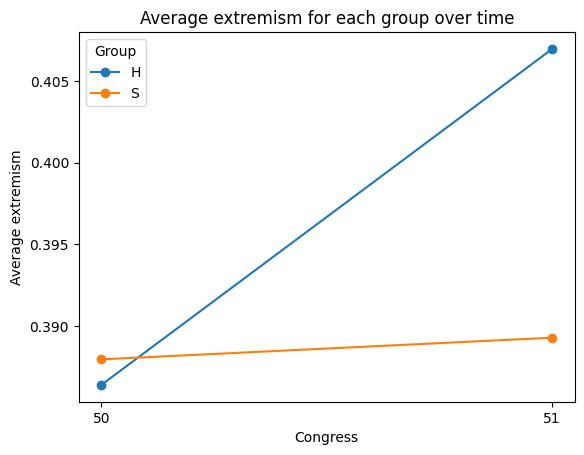

In [ ]:
house_avg_extremism = house_df.groupby(by=["congress"])["extremism"].mean()

senate_df = df[df["chamber"] == "Senate"]
senate_avg_extremism = senate_df.groupby(by=["congress"])["extremism"].mean()

mplt.plot(house_avg_extremism, marker="o", markersize=6, label="H")
mplt.plot(senate_avg_extremism, marker="o", markersize=6, label="S")
mplt.title("Average extremism for each group over time")
mplt.xlabel("Congress")
mplt.ylabel("Average extremism")
mplt.xticks(ticks=[50,51])
mplt.legend(["H", "S"], title="Group")
mplt.show()

10. In the difference-in-differences design, what quantity are we using as an estimate of the counterfactual for the House in the 51st Congress? What is the name of the assumption that justifies the use of this counterfactual and what does it mean in words?

We use the difference in gradient of the Average Extremism of the House in 51st Congress and the gradient of the Average Extremism of the Senate in 50th Congress (counterfactual gradient)

This is the Parallel trends assumption, meaning outcome for the House in 51st Congress would have been parallel (constant difference) in absence of treatment (Reed's rules), to that of the Senate in 50th Congress.

11. Compute and print the difference-in-differences estimate. Interpret your results.

In [ ]:
house_gradient = house_df[house_df["congress"] == 51]["extremism"].mean() - house_df[house_df["congress"] == 50]["extremism"].mean()
senate_gradient = senate_df[senate_df["congress"] == 51]["extremism"].mean() - senate_df[senate_df["congress"] == 50]["extremism"].mean()
difference_in_differences_estimate = house_gradient - senate_gradient
print(difference_in_differences_estimate)

0.019245979897799415


This confirms that Reed's rules indeed caused an increase in average extremism for the House by about 0.019, having a causal effect.

12. Name two threats to the validity of this estimate and how you would try to investigate or mitigate these factors if you had more time and data.

1) Potentially limited internal validity since the key assumption often doesn't hold/isn't true

This may be mitigated by examining the pre-treatment period, Eg. during the 50th Congress, to assess the similarity of trends between the House and Senate groups in more detail. Specifically, looking out for any systematic differences in the trends that could affect/negate the parallel trends assumption

2) Doesn't control for observed time-varying Confounders

This may be mitigated by collecting more data and including relevant covariates in the analysis to control for observed time-varying confounders. By adding these variables as control variables, the potential bias due to their omission may be mitigated.

In [ ]:
# If it contains spaces, use '\ ' to represent each space E.g. 'Summer\ PSet\ 1.ipynb'
FILENAME = "PS2_AndrewYu.ipynb"

%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2
!jupyter nbconvert --log-level CRITICAL --to pdf $FILENAME

/content/drive/My Drive
/content/drive/My Drive/Stanford Summer Session/DATASCI 154/PS2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodin